**Name : Dhruvi Shah**

**Student Id : 202211032**

**DL Assignment2**



In [ ]:
import math
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from tensorflow.keras.losses import MeanSquaredLogarithmicError
from tensorflow.keras.losses import MeanSquaredError
import numpy as np
from sklearn.metrics import mean_squared_error

#heart dataset

In [ ]:
df_heart=pd.read_csv('heart.csv')
df_heart.head(8)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1


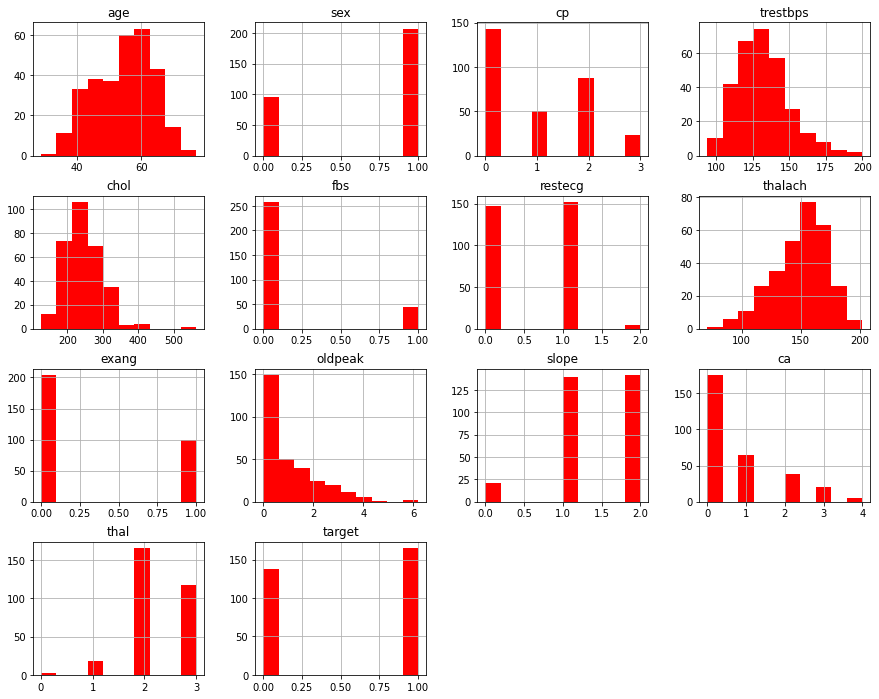

In [ ]:
df_heart.hist(figsize=(15,12),bins = 10, color='red')
plt.title("Features Distribution for heart dataset")
plt.show()

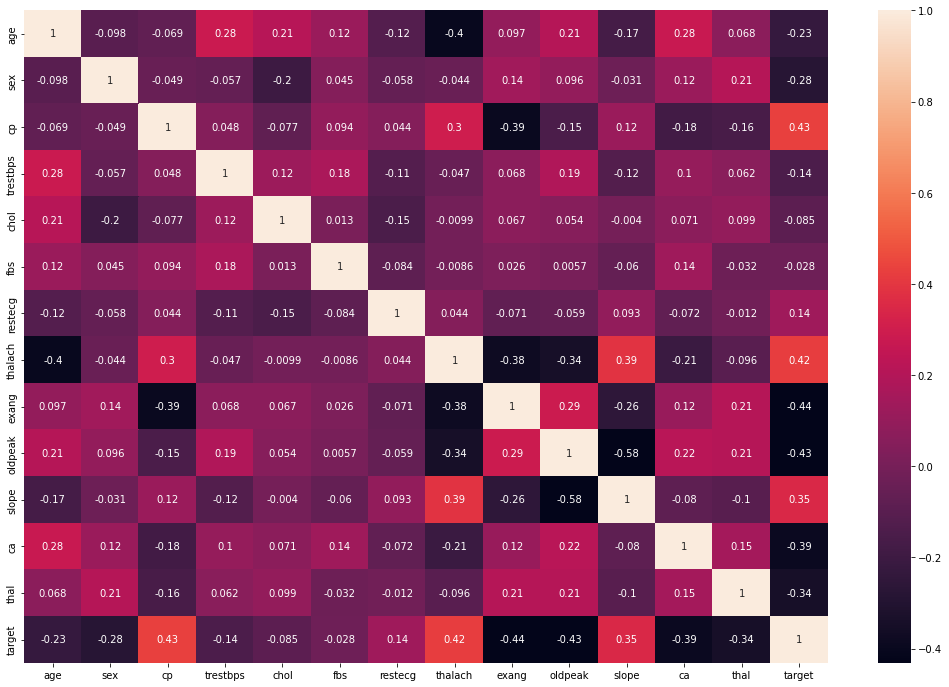

In [ ]:
import seaborn as sns
plt.subplots(figsize=(18,12))
sns.heatmap(df_heart.corr(),robust=True,annot=True)

In [ ]:
# dividing data into train set and test set
train_data1, test_data1 = train_test_split(df_heart, test_size=0.2, random_state=30)

In [ ]:
# Seperating Features and Target values
x_train1, y_train1 = train_data1.drop('target', axis=1), train_data1['target']
x_test1, y_test1 = test_data1.drop('target', axis=1), test_data1['target']

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
y_test1.shape

(61, 2)

In [ ]:
ohe = OneHotEncoder()

y_train1=np.array(y_train1).reshape(-1,1)
y_train1 = ohe.fit_transform(y_train1).toarray()

y_test1=np.array(y_test1).reshape(-1,1)
y_test1 = ohe.fit_transform(y_test1).toarray()

In [ ]:
#normalizing data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the Features of trainset and testset
x_train_scaled_all1, x_test_scaled_all1 = scale_datasets(x_train1, x_test1)

In [ ]:
# Dividing scaled train data into train and validation data

X_train_scaled1, X_val_scaled1, Y_train1, Y_val1 = train_test_split(x_train_scaled_all1, y_train1, test_size=0.20, random_state=25)
print(X_train_scaled1.shape)
print(Y_train1.shape)
print(X_val_scaled1.shape)


(193, 13)
(193, 2)
(49, 13)


In [ ]:
# Defining model for classification
model1 = Sequential()
model1.add(Dense(activation = "relu", input_dim = 13, units = 10, kernel_initializer = "uniform"))
model1.add(Dense(activation = "relu", units = 9,kernel_initializer = "uniform"))
model1.add(Dense(activation = "softmax", units = 2,kernel_initializer = "uniform"))
model1.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                140       
                                                                 
 dense_1 (Dense)             (None, 9)                 99        
                                                                 
 dense_2 (Dense)             (None, 2)                 20        
                                                                 
Total params: 259
Trainable params: 259
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history1= model1.fit(X_train_scaled1 , Y_train1 , batch_size = 8 ,epochs = 200 )

Epoch 1/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0967 - accuracy: 0.9793
Epoch 2/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0960 - accuracy: 0.9793
Epoch 3/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0923 - accuracy: 0.9793
Epoch 4/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0941 - accuracy: 0.9793
Epoch 5/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0928 - accuracy: 0.9793
Epoch 6/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0936 - accuracy: 0.9741
Epoch 7/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0923 - accuracy: 0.9793
Epoch 8/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0924 - accuracy: 0.9741
Epoch 9/200
25/25 [==============================] - 0s 2ms/step - loss: 0.0907 - accuracy: 0.9793
Epoch 10/200
25/25 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.9793
Epoch 11/

In [ ]:
# prediction on scalled train data
pred_train1= model1.predict(X_train_scaled1)
scores = model1.evaluate(X_train_scaled1, Y_train1, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores[1]*100, (1 - scores[1])*100))   

7/7 [==============================] - 0s 2ms/step
Accuracy on training data: 97.92746305465698% 
Error on training data: 2.0725369453430176


In [ ]:
# prediction on scalled test data
pred_test1= model1.predict(x_test_scaled_all1)

scores1 = model1.evaluate(x_test_scaled_all1, y_test1, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores1[1]*100, (1 - scores1[1])*100))  

2/2 [==============================] - 0s 5ms/step
Accuracy on test data: 80.32786846160889% 
Error on test data: 19.672131538391113


In [ ]:
#Converting predictions to label(reversing onehot encoding operation)
pred1 = list()
for i in range(len(pred_test1)):
    pred1.append(np.argmax(pred_test1[i])) 

In [ ]:
#Converting predictions to label(reversing onehot encoding operation) 
test1 = list()
for i in range(len(y_test1)):
    test1.append(np.argmax(y_test1[i]))

## mobile dataset
##Classification of mobile into various price ranges

In [ ]:
df_mob=pd.read_csv('Mobile_price.csv')
df_mob.head(8)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0


In [ ]:
priceranges=df_mob['price_range'].unique()
print(priceranges)

[1 2 3 0]


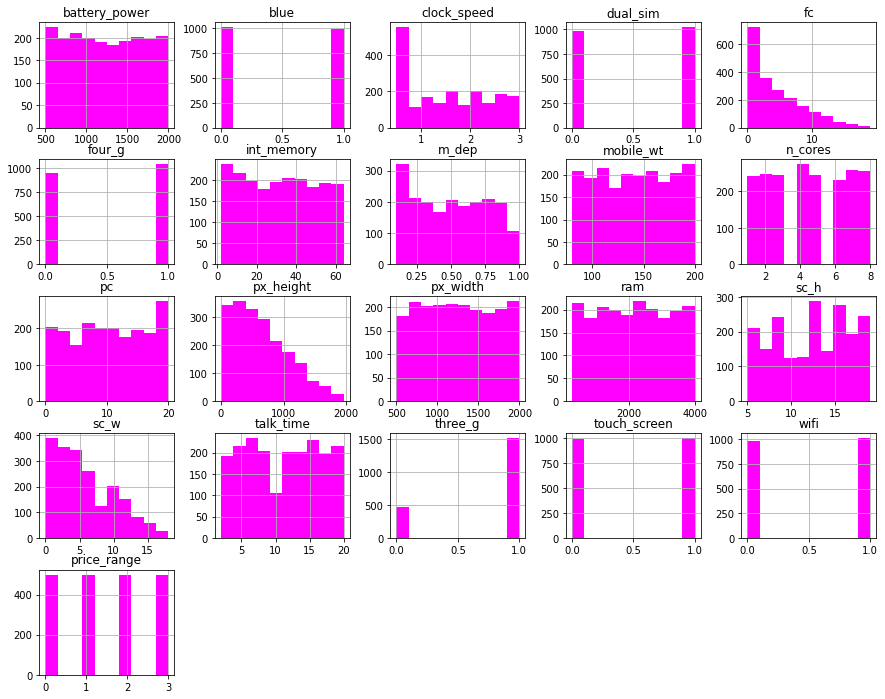

In [ ]:
df_mob.hist(figsize=(15,12),bins = 10, color="magenta")
plt.title("Features Distribution")
plt.show()

In [ ]:
df_mob.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


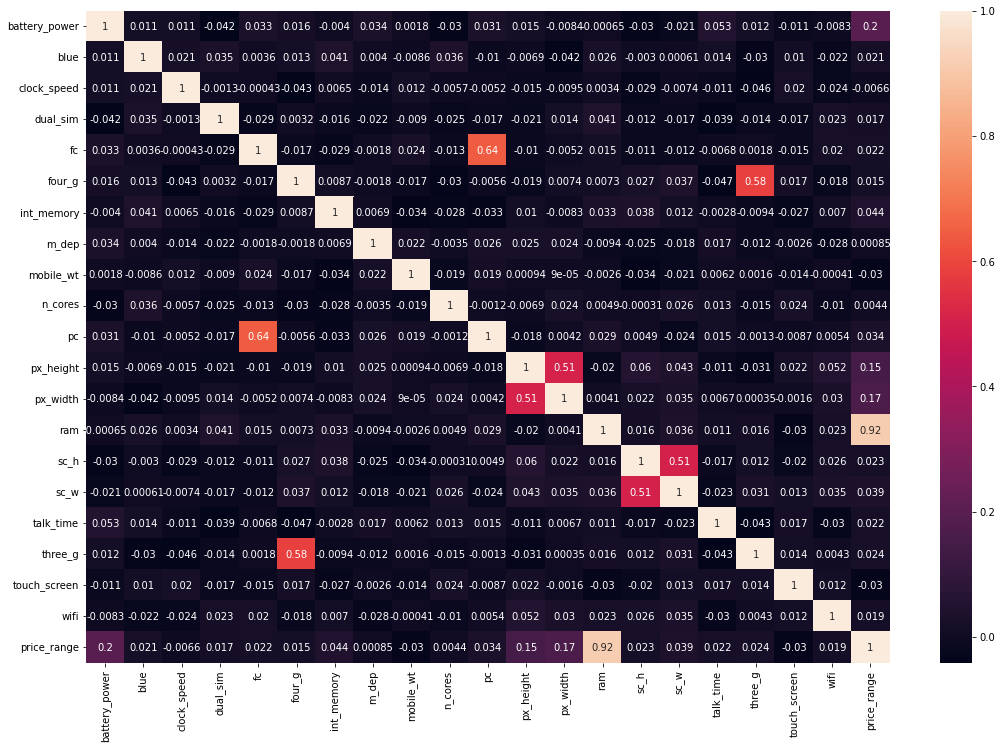

In [ ]:
import seaborn as sns
plt.subplots(figsize=(18,12))
sns.heatmap(df_mob.corr(),robust=True,annot=True)

In [ ]:
# dividing data into train set and test set
train_data2, test_data2 = train_test_split(df_mob, test_size=0.2, random_state=100)

In [ ]:
#separating input features and output features
x_train2, y_train2 = train_data2.drop('price_range', axis=1), train_data2['price_range']
x_test2, y_test2 = test_data2.drop('price_range', axis=1), test_data2['price_range']

In [ ]:
#one hot encoding on target values based on no of class
ohe = OneHotEncoder()

y_train2=np.array(y_train2).reshape(-1,1)
y_train2 = ohe.fit_transform(y_train2).toarray()

y_test2=np.array(y_test2).reshape(-1,1)
y_test2 = ohe.fit_transform(y_test2).toarray()

In [ ]:
#function to normalize the data

def scale_datasets(x_train, x_test):
  standard_scaler = StandardScaler()
  x_train_scaled = pd.DataFrame(standard_scaler.fit_transform(x_train),columns=x_train.columns)
  x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test),columns = x_test.columns)
  return x_train_scaled, x_test_scaled

In [ ]:
# normalizing the original data
x_train_scaled_all2, x_test_scaled_all2 = scale_datasets(x_train2, x_test2)

In [ ]:
model2 = Sequential()
model2.add(Dense(activation = "relu", input_dim = 20, 
                     units = 40, kernel_initializer = "uniform"))
model2.add(Dense(activation = "relu", units = 20, 
                     kernel_initializer = "uniform"))
model2.add(Dense(activation = "softmax", units = 4, 
                     kernel_initializer = "uniform"))
model2.compile(optimizer = 'rmsprop' , loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
model2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 40)                840       
                                                                 
 dense_7 (Dense)             (None, 20)                820       
                                                                 
 dense_8 (Dense)             (None, 4)                 84        
                                                                 
Total params: 1,744
Trainable params: 1,744
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history2 = model2.fit(x_train_scaled_all2,y_train2,epochs=80,validation_data=(x_test_scaled_all2,y_test2))

Epoch 1/80
50/50 [==============================] - 1s 7ms/step - loss: 1.3616 - accuracy: 0.4219 - val_loss: 1.2924 - val_accuracy: 0.5050
Epoch 2/80
50/50 [==============================] - 0s 3ms/step - loss: 1.1535 - accuracy: 0.4969 - val_loss: 0.9973 - val_accuracy: 0.5125
Epoch 3/80
50/50 [==============================] - 0s 3ms/step - loss: 0.8860 - accuracy: 0.4969 - val_loss: 0.7840 - val_accuracy: 0.5150
Epoch 4/80
50/50 [==============================] - 0s 3ms/step - loss: 0.7242 - accuracy: 0.5419 - val_loss: 0.6615 - val_accuracy: 0.6500
Epoch 5/80
50/50 [==============================] - 0s 3ms/step - loss: 0.6046 - accuracy: 0.7156 - val_loss: 0.5472 - val_accuracy: 0.7975
Epoch 6/80
50/50 [==============================] - 0s 3ms/step - loss: 0.4940 - accuracy: 0.8338 - val_loss: 0.4451 - val_accuracy: 0.8850
Epoch 7/80
50/50 [==============================] - 0s 3ms/step - loss: 0.3908 - accuracy: 0.8975 - val_loss: 0.3503 - val_accuracy: 0.9125
Epoch 8/80
50/50 [==

In [ ]:
print(history2)

In [ ]:
pred_train2= model2.predict(x_train_scaled_all2)
scores2 = model2.evaluate(x_train_scaled_all2,y_train2, verbose=0)
print('Accuracy on training data: {}% \nError on training data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))   

50/50 [==============================] - 0s 4ms/step
Accuracy on training data: 99.93749856948853% 
Error on training data: 0.06250143051147461


In [ ]:
pred_test2= model2.predict(x_test_scaled_all2)
scores2 = model2.evaluate(x_test_scaled_all2, y_test2, verbose=0)
print('Accuracy on test data: {}% \nError on test data: {}'.format(scores2[1]*100, (1 - scores2[1])*100))    

13/13 [==============================] - 0s 2ms/step
Accuracy on test data: 94.9999988079071% 
Error on test data: 5.0000011920928955


In [ ]:
#Converting predictions to label
pred2 = list()
for i in range(len(pred_test2)):
    pred2.append(np.argmax(pred_test2[i])) 

In [ ]:
#Converting predictions to label
test2 = list()
for i in range(len(y_test2)):
    test2.append(np.argmax(y_test2[i]))

In [ ]:
#comparing test and prediction
pd.DataFrame({'Test':test2,'Pred':pred2}).head(25)

,Test,Pred
0,0,0
1,1,1
2,1,1
3,3,3
4,2,2
5,3,3
6,3,3
7,2,2
8,3,3
9,0,1


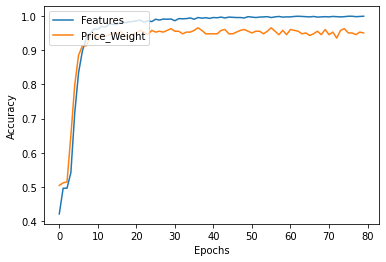

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

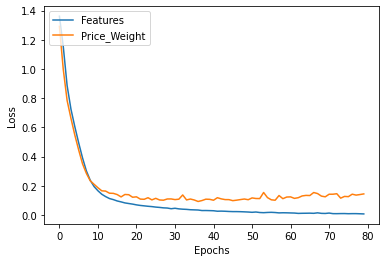

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Features','Price_Weight'],loc='upper left')
plt.show()

##Regression for mobile battery power

In [ ]:
df_mob=pd.read_csv("Mobile_price.csv")

In [ ]:
df_mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
X_mob = df_mob.iloc[:,0:20]
y_mob = df_mob.iloc[:,-1]

In [ ]:
X_mob.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [ ]:
sc1 = StandardScaler()
X_mob = sc1.fit_transform(X_mob)

In [ ]:
X_trainreg, X_testreg, y_trainreg, y_testreg = train_test_split(X_mob, y_mob, test_size=0.20, random_state=101)

In [ ]:
X_mob.shape

(2000, 20)

In [ ]:
model_mob = Sequential()
model_mob.add(Dense(activation = "relu", input_dim = 20, 
                     units = 16, kernel_initializer = "uniform"))
model_mob.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model_mob.add(Dense(activation = "linear", units = 1, 
                     kernel_initializer = "uniform"))

In [ ]:
model_mob.compile(optimizer = 'rmsprop' , loss = 'mae', 
                   metrics = ['mae'] )

In [ ]:
history_mob = model_mob.fit(X_trainreg,y_trainreg,epochs=100,validation_data=(X_testreg,y_testreg),batch_size=32)

Epoch 1/100
50/50 [==============================] - 1s 5ms/step - loss: 1.4021 - mae: 1.4021 - val_loss: 1.1820 - val_mae: 1.1820
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.8904 - mae: 0.8904 - val_loss: 0.5829 - val_mae: 0.5829
Epoch 3/100
50/50 [==============================] - 0s 3ms/step - loss: 0.4687 - mae: 0.4687 - val_loss: 0.3714 - val_mae: 0.3714
Epoch 4/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3410 - mae: 0.3410 - val_loss: 0.3395 - val_mae: 0.3395
Epoch 5/100
50/50 [==============================] - 0s 3ms/step - loss: 0.3055 - mae: 0.3055 - val_loss: 0.3119 - val_mae: 0.3119
Epoch 6/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2853 - mae: 0.2853 - val_loss: 0.3016 - val_mae: 0.3016
Epoch 7/100
50/50 [==============================] - 0s 3ms/step - loss: 0.2728 - mae: 0.2728 - val_loss: 0.2944 - val_mae: 0.2944
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2652 - m

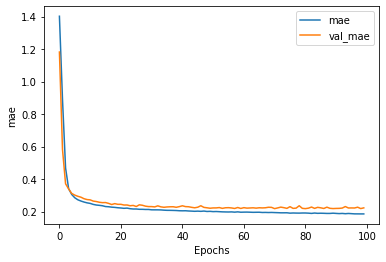

In [ ]:
def plot_history(history_mob, key):
  plt.plot(history_mob.history[key])
  plt.plot(history_mob.history['val_'+key])
  plt.xlabel("Epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_mob, 'mae')

In [ ]:
y_pred_mob=model_mob.predict(X_testreg)[0]

13/13 [==============================] - 0s 3ms/step


In [ ]:
y_pred_mob

array([0.9971106], dtype=float32)

#50 start-up datasets for predicting the profit values of the companies

In [ ]:
import pandas as pd

In [ ]:
df_50startup=pd.read_csv("50_Startups.csv")

In [ ]:
df_50startup.head(8)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60


In [ ]:
X_50 = df_50startup.iloc[:,0:3]
y_50 = df_50startup.iloc[:,-1]

In [ ]:
X_50.head()

,R&D Spend,Administration,Marketing Spend
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


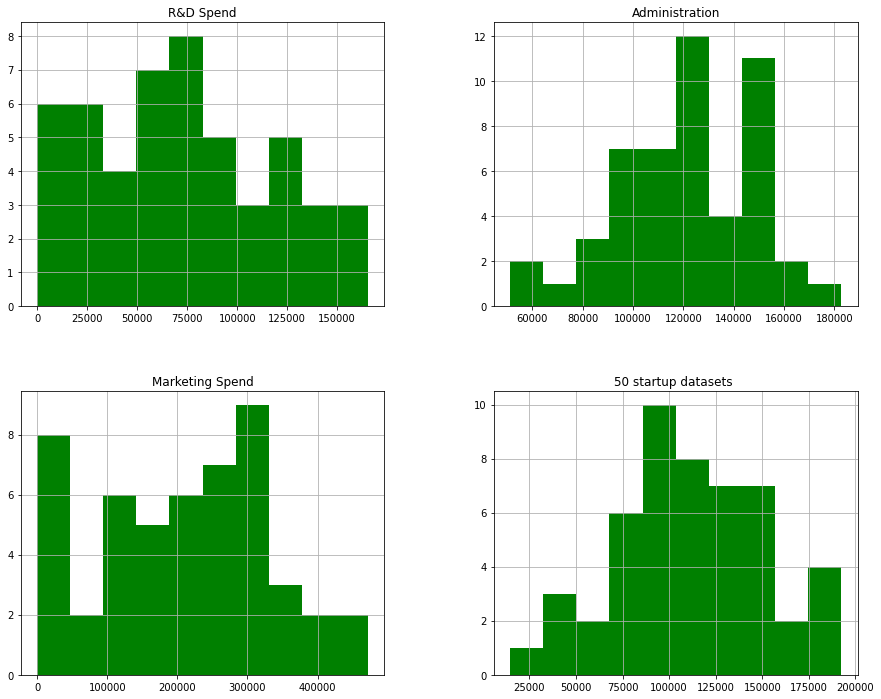

In [ ]:
df_50startup.hist(figsize=(15,12),bins = 10, color='green')
plt.title("50 startup datasets ")
plt.show()

In [ ]:
sc50 = StandardScaler()
X_50 = sc50.fit_transform(X_50)

#y_50 = y_50.reshape(-1,1)
#y_50 = sc50.fit_transform(y_50)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_50, y_50, test_size=0.20, random_state=65)

In [ ]:
X_train.shape

(40, 3)

In [ ]:
model50 = Sequential()
model50.add(Dense(activation = "relu", input_dim = 3, 
                     units = 16, kernel_initializer = "uniform"))
model50.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50.add(Dense(activation = "linear", units = 1, 
                     kernel_initializer = "uniform"))

In [ ]:
model50.compile(
    loss='mae', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

In [ ]:
history_50 = model50.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/600
1/1 [==============================] - 1s 534ms/step - loss: 115129.7266 - mae: 115129.7266 - val_loss: 99544.2656 - val_mae: 99544.2656
Epoch 2/600
1/1 [==============================] - 0s 36ms/step - loss: 115129.7109 - mae: 115129.7109 - val_loss: 99544.2422 - val_mae: 99544.2422
Epoch 3/600
1/1 [==============================] - 0s 33ms/step - loss: 115129.6875 - mae: 115129.6875 - val_loss: 99544.2188 - val_mae: 99544.2188
Epoch 4/600
1/1 [==============================] - 0s 33ms/step - loss: 115129.6641 - mae: 115129.6641 - val_loss: 99544.1797 - val_mae: 99544.1797
Epoch 5/600
1/1 [==============================] - 0s 31ms/step - loss: 115129.6250 - mae: 115129.6250 - val_loss: 99544.1406 - val_mae: 99544.1406
Epoch 6/600
1/1 [==============================] - 0s 35ms/step - loss: 115129.5781 - mae: 115129.5781 - val_loss: 99544.0859 - val_mae: 99544.0859
Epoch 7/600
1/1 [==============================] - 0s 38ms/step - loss: 115129.5234 - mae: 115129.5234 - val_lo

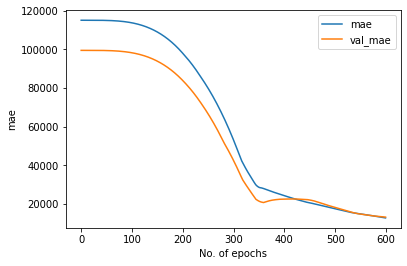

In [ ]:
def plot_history(history_50, key):
  plt.plot(history_50.history[key])
  plt.plot(history_50.history['val_'+key])
  plt.xlabel("No. of epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_50, 'mae')

In [ ]:
y_pred=model50.predict(X_test)[0]

1/1 [==============================] - 0s 56ms/step


In [ ]:
y_pred

array([78458.85], dtype=float32)

#using 30 layers for 50 startup dataset

In [ ]:
model50_new = Sequential()
model50_new.add(Dense(activation = "relu", input_dim = 3, 
                     units = 16, kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 64, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "relu", units = 32, 
                     kernel_initializer = "uniform"))
model50_new.add(Dense(activation = "linear", units = 1, 
                     kernel_initializer = "uniform"))

In [ ]:
model50_new.compile(
    loss='mae', 
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), 
    metrics=['mae']
)

In [ ]:
history_50_new = model50_new.fit(X_train,y_train,epochs=600,validation_data=(X_test,y_test),batch_size=128)

Epoch 1/600
1/1 [==============================] - 2s 2s/step - loss: 115129.7266 - mae: 115129.7266 - val_loss: 99544.2656 - val_mae: 99544.2656
Epoch 2/600
1/1 [==============================] - 0s 41ms/step - loss: 115129.7109 - mae: 115129.7109 - val_loss: 99544.2578 - val_mae: 99544.2578
Epoch 3/600
1/1 [==============================] - 0s 71ms/step - loss: 115129.7031 - mae: 115129.7031 - val_loss: 99544.2344 - val_mae: 99544.2344
Epoch 4/600
1/1 [==============================] - 0s 40ms/step - loss: 115129.6719 - mae: 115129.6719 - val_loss: 99544.2109 - val_mae: 99544.2109
Epoch 5/600
1/1 [==============================] - 0s 37ms/step - loss: 115129.6641 - mae: 115129.6641 - val_loss: 99544.1875 - val_mae: 99544.1875
Epoch 6/600
1/1 [==============================] - 0s 42ms/step - loss: 115129.6250 - mae: 115129.6250 - val_loss: 99544.1484 - val_mae: 99544.1484
Epoch 7/600
1/1 [==============================] - 0s 41ms/step - loss: 115129.6016 - mae: 115129.6016 - val_loss:

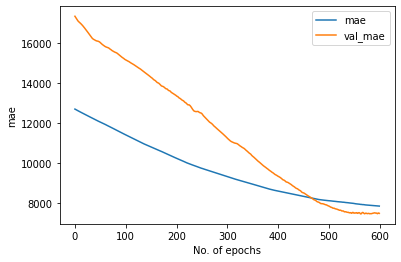

In [ ]:
def plot_history(history_50_new, key):
  plt.plot(history_50_new.history[key])
  plt.plot(history_50_new.history['val_'+key])
  plt.xlabel("No. of epochs")
  plt.ylabel(key)
  plt.legend([key, 'val_'+key])
  plt.show()
# Plot the history
plot_history(history_50_new, 'mae')